In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import os 
import cv2 # For reading the image
import skimage.io 
import matplotlib.pylab    as plt
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline  
# This will display the image inside the notebook

In [2]:
from natsort import natsorted

os.environ["CUDA_VISIBLE_DEVICES"]=""

In [3]:
# Define input data
X_data = np.arange(100, step=0.1)
y_data = X_data + 10 * np.sin(X_data/10)

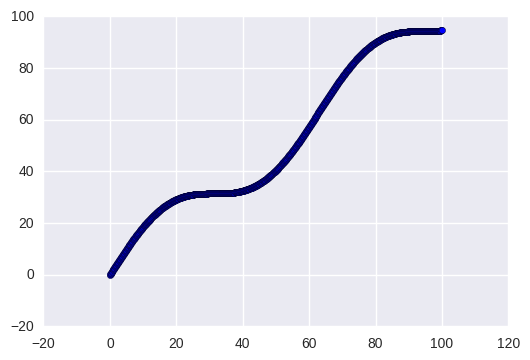

In [4]:
# Plot input data
plt.scatter(X_data, y_data)

In [5]:
# Define data size and batch size
nb_samples = 1000
batch_size = 1000

# Tensorflow is finicky about shapes, so resize
X_data = np.reshape(X_data, (nb_samples,1))
y_data = np.reshape(y_data, (nb_samples,1))
# Define placeholders for input
X = tf.placeholder(tf.float32, shape=(batch_size, 1))
y = tf.placeholder(tf.float32, shape=(batch_size, 1)) 

In [6]:
#X_data = np.reshape(X_data, (nb_samples,1))
#y_data = np.reshape(y_data, (nb_samples,1))
# Seed the random
tf.set_random_seed(2016)

In [7]:
# Define placeholders for input
X = tf.placeholder(tf.float32, shape=(batch_size, 1))
y = tf.placeholder(tf.float32, shape=(batch_size, 1)) 

In [8]:
# Define variables to be learned
with tf.variable_scope("linear-regression"):
    W = tf.get_variable("weights", (1, 1), initializer=tf.random_normal_initializer())
    b = tf.get_variable("bias", (1,), initializer=tf.constant_initializer(0.0))
    y_pred = tf.matmul(X, W) + b
    loss = tf.reduce_sum((y - y_pred)**2/nb_samples)


In [9]:
    
minimizer = tf.train.AdamOptimizer().minimize(loss)

0 272.523 [[ 0.7596426]] [ 0.001]
1 281.562 [[ 0.76064324]] [ 0.00200024]
2 271.805 [[ 0.76164401]] [ 0.0029998]
3 274.757 [[ 0.76264453]] [ 0.00399919]
4 280.735 [[ 0.7636463]] [ 0.00499923]
5 284.273 [[ 0.76464933]] [ 0.006]
6 262.035 [[ 0.76564932]] [ 0.00699876]
7 258.822 [[ 0.76664621]] [ 0.00799636]
8 259.704 [[ 0.7676419]] [ 0.00899259]
9 263.302 [[ 0.76863676]] [ 0.00998823]
10 246.202 [[ 0.76962727]] [ 0.0109814]
11 261.021 [[ 0.77061796]] [ 0.0119746]
12 273.342 [[ 0.77161151]] [ 0.01296961]
13 273.765 [[ 0.77260697]] [ 0.01396623]
14 257.55 [[ 0.77360117]] [ 0.01496163]
15 251.128 [[ 0.77459329]] [ 0.01595477]
16 263.439 [[ 0.77558589]] [ 0.01694852]
17 250.347 [[ 0.77657735]] [ 0.01794026]
18 235.92 [[ 0.77756274]] [ 0.01892807]
19 250.736 [[ 0.77854854]] [ 0.01991558]
20 246.819 [[ 0.77953368]] [ 0.02090252]
21 247.475 [[ 0.78051722]] [ 0.02188873]
22 244.974 [[ 0.78150004]] [ 0.02287426]
23 250.291 [[ 0.78248245]] [ 0.0238593]
24 228.2 [[ 0.78346014]] [ 0.0248404]
25 251.

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


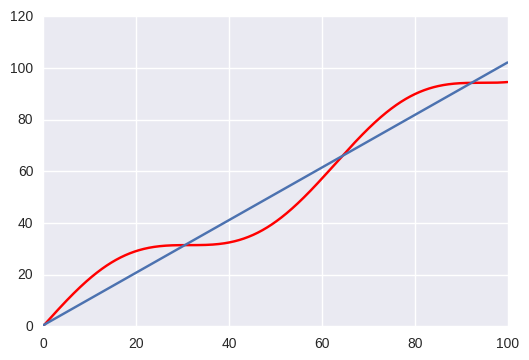

In [10]:
# Sample code to run full gradient descent:
# Define optimizer operation
with tf.Session() as sess:

    # Initialize Variables in graph
    sess.run(tf.global_variables_initializer())

    # Gradient descent loop for 500 steps
    for epoch in range(1000):
    # Select random minibatch
        indices = np.random.choice(nb_samples, batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]
        # Do gradient descent step
        _, loss_val = sess.run([minimizer, loss], feed_dict={X: X_batch, y: y_batch})

        #Display logs per epoch step
        print epoch, loss_val, sess.run(W), sess.run(b)

    print "Optimization Finished!"
    loss_val = sess.run(loss, feed_dict={X: X_data, y: y_data})
    print "Training cost=", loss_val, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(X_data, y_data, 'r', )
    plt.plot(X_data, sess.run(W) * X_data + sess.run(b),)
    plt.legend()
    plt.show()